<a href="https://colab.research.google.com/github/Dimildizio/DS_course/blob/main/Neural_networks/Convolutions/Simple_convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
! wget https://www.kotzendes-einhorn.de/blog/wp-content/uploads/2011/01/lenna.jpg
! wget https://www.teahub.io/photos/full/236-2368950_happy-corgi-wallpaper-corgi-hd.jpg

--2023-06-03 22:20:13--  https://www.kotzendes-einhorn.de/blog/wp-content/uploads/2011/01/lenna.jpg
Resolving www.kotzendes-einhorn.de (www.kotzendes-einhorn.de)... 94.130.145.107
Connecting to www.kotzendes-einhorn.de (www.kotzendes-einhorn.de)|94.130.145.107|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64098 (63K) [image/jpeg]
Saving to: ‘lenna.jpg’

lenna.jpg           100%[===================>]  62.60K  --.-KB/s    in 0.1s    

2023-06-03 22:20:14 (546 KB/s) - ‘lenna.jpg’ saved [64098/64098]

--2023-06-03 22:20:14--  https://www.teahub.io/photos/full/236-2368950_happy-corgi-wallpaper-corgi-hd.jpg
Resolving www.teahub.io (www.teahub.io)... 198.204.228.67
Connecting to www.teahub.io (www.teahub.io)|198.204.228.67|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 260168 (254K) [image/jpeg]
Saving to: ‘236-2368950_happy-corgi-wallpaper-corgi-hd.jpg’

236-2368950_happy-c 100%[===================>] 254.07K  --.-KB/s    in 0.07s   

202

In [9]:
from PIL import Image
from math import ceil, sqrt
from math import floor

import matplotlib.pyplot as plt
import numpy as np
import cv2
import imageio

In [ ]:
#get a picture

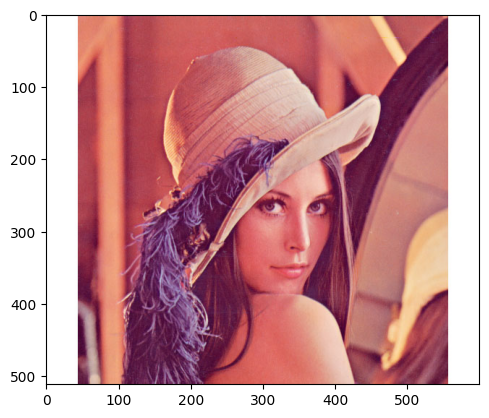

In [10]:
img = Image.open('lenna.jpg')
pixels = img.load()
plt.imshow(img)

In [11]:
filter1 = [
    [-1, -1, 0, 0, 0],
    [0, -1, -1, -1, 0],
    [0, -1, 9, -1, 0],
    [0, -1, -1, -1, 0],
    [0, 0, 0, 0, 0]
]


filter2 = [
    [-1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1],
    [-1, -1, 4, -1, -1],
    [-1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1]
]


filter3 = [
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 1, 1, 1, 0, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [1, 1, 1, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 0, 1, 1, 1, 0, 0],
    [0, 0, 0, 1, 0, 0, 0]
]


filter4 = [
    [-1, -1, -1],
    [-1, 9, -1],
    [-1, -1, -1]
]


filter5 = [
    [0.5, 1.5, 2, 1.5, 0.5],
    [1.5, 3.5, 5, 3.5, 1.5],
    [  2,   5, 10,  5,   2],
    [1.5, 3.5, 5, 3.5, 1.5],
    [0.5, 1.5, 2, 1.5, 0.5]
]

filter6 = [
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
]

filter7 = [
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1]
]

In [38]:
filters = [filter1,filter2,filter3,filter4,filter5,filter6,filter7]

In [12]:
#mult every element of a color intensity matrix by corresponding element of filter matrix and sum up the result 
def convolution(img, kernel):
  return np.sum(np.multiply(img, kernel))

In [13]:
def sum_filter(filter):
  '''get the sum of all values in kernel'''
  return np.sum(filter) or 1
  
def apply_filter(img, filter, new = True):
  picture = img.copy() if True else img
  img_px_inplace = picture.load()                                  #careful - its inplace of the img you load
  kernel_start = floor(len(filter)/2)
  kernel_end = ceil(len(filter)/2)
  filter_sum = sum_filter(filter)                                  #get a sum of all vals in filter
  clr_min, clr_max = 0, 255

  for row in range(kernel_start, picture.width - kernel_start):     #go by cols
    for col in range(kernel_start, picture.height - kernel_start):  #go by rows
      y_R, y_G, y_B = [], [], []
      for kernel_row in range(-kernel_start, kernel_end):           #go through filter window from pixel-kernel side to pixel+kernel side. rows
        x_R, x_G, x_B = [], [], []
        for kernel_col in range (-kernel_start, kernel_end):        #cols. and aapend r g b values
          r, g, b = img_px_inplace[row+kernel_row, col+kernel_col]  #get color values
          x_R.append(r)
          x_G.append(g)
          x_B.append(b)
        y_R.append(x_R)
        y_G.append(x_G)
        y_B.append(x_B)
                                                                    #can't convert float64 using int() or // so use round(or astype) with no arg
      r_px = round(convolution(y_R, filter)/filter_sum)             #get element-wise filter * taken by filter pxls            
      g_px = round(convolution(y_G, filter)/filter_sum)             #color values by filter from img
      b_px = round(convolution(y_B, filter)/filter_sum)             #divided sum of elements in filter size

      r = np.clip(r_px, clr_min, clr_max)      
      g = np.clip(g_px, clr_min, clr_max)
      b = np.clip(b_px, clr_min, clr_max)
      img_px_inplace[row, col] = (r,g,b)
  return picture


In [14]:

def plot_each(img, fil):
  i = 0
  for fil in filters:
    i+=1
    print('filter',i)
    new_img = apply_filter(img, fil)
    plt.imshow(new_img)
    plt.show()

plot_each(img, filters)

for fil in filters:
  new_img = apply_filter(img, fil)
  plt.imshow(new_img)


filter 1


KeyboardInterrupt: ignored

In [34]:
corgimg = Image.open('236-2368950_happy-corgi-wallpaper-corgi-hd.jpg')

In [16]:
gauss_blur = [[1/16, 1/8, 1/16],
              [1/8, 1/4, 1/8],
              [1/16, 1/8, 1/16]]

sharpen = [[0, -1, 0], 
           [-1, 5, -1], 
           [0, -1, 0]]

left_sobel = [[-1, 0, 1], 
              [-2, 0, 2], 
              [-1, 0, 1]]

right_sobel = [[-1, -2, -1], 
              [0, 0, 0], 
              [1, 2, 1]]

filter_names = [gauss_blur, sharpen, left_sobel, right_sobel]

filter 1


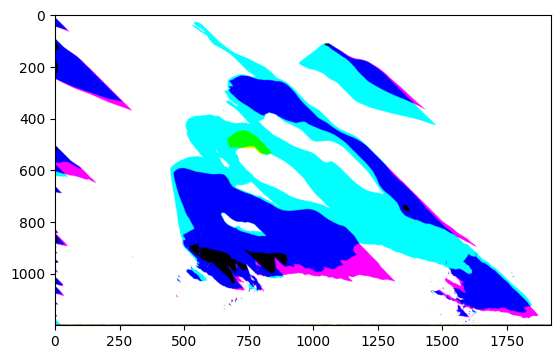

filter 2


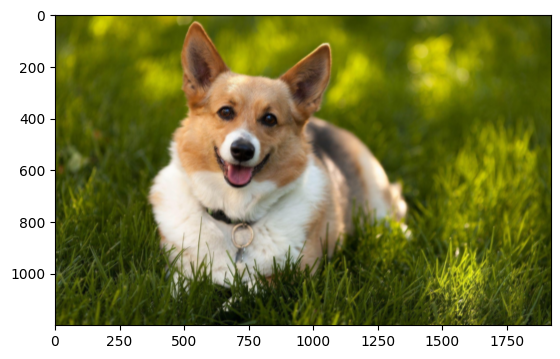

filter 3


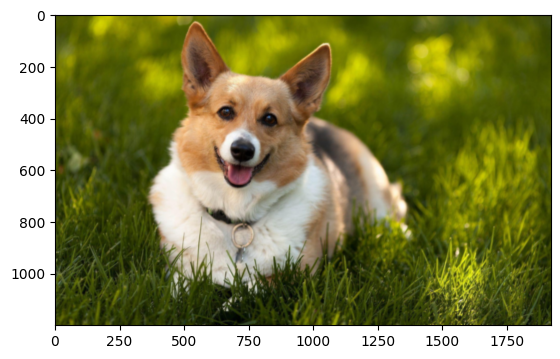

filter 4


KeyboardInterrupt: ignored

In [ ]:
plot_each(corgimg, filter_names)

In [17]:
#sharp filter
sharp = np.ones((3,3), np.float32) * -0.1
sharp[1,1] = 5 

#3D effect
emboss = np.array([[-2, -1, 0],
                   [-1, 1, 1],
                   [0, 1, 2]])

In [18]:
def url_to_image(url):
    image = imageio.imread(url)
    return image 

<ipython-input-19-ce741f59171f>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(url)


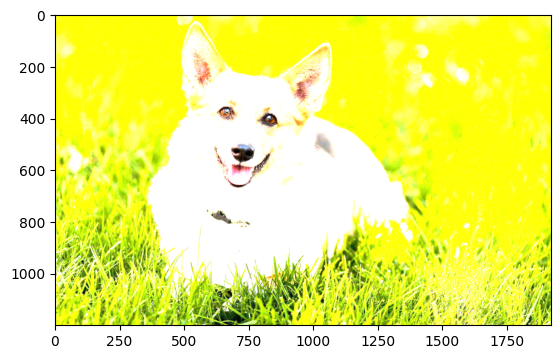

In [ ]:
sharpened = cv2.filter2D(url_to_image('https://www.teahub.io/photos/full/236-2368950_happy-corgi-wallpaper-corgi-hd.jpg'), -1, sharp)
plt.imshow(sharpened)

<ipython-input-18-8d756e62b272>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(url)


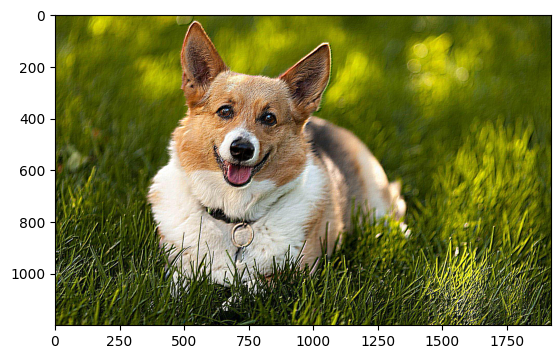

In [19]:
embossed = cv2.filter2D(url_to_image('https://www.teahub.io/photos/full/236-2368950_happy-corgi-wallpaper-corgi-hd.jpg'), -1, emboss)
plt.imshow(embossed)

<ipython-input-19-ce741f59171f>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(url)


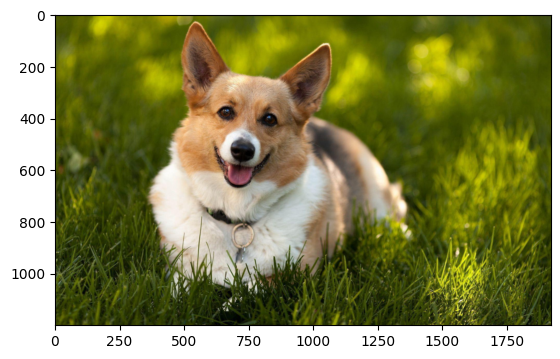

In [ ]:
blurred = cv2.filter2D(url_to_image('https://www.teahub.io/photos/full/236-2368950_happy-corgi-wallpaper-corgi-hd.jpg'), -1, np.array(gauss_blur))
plt.imshow(blurred)

In [31]:
corg = url_to_image('https://www.teahub.io/photos/full/236-2368950_happy-corgi-wallpaper-corgi-hd.jpg')

<ipython-input-18-8d756e62b272>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(url)


<ipython-input-18-8d756e62b272>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(url)


CPU times: user 105 ms, sys: 8.12 ms, total: 113 ms
Wall time: 325 ms


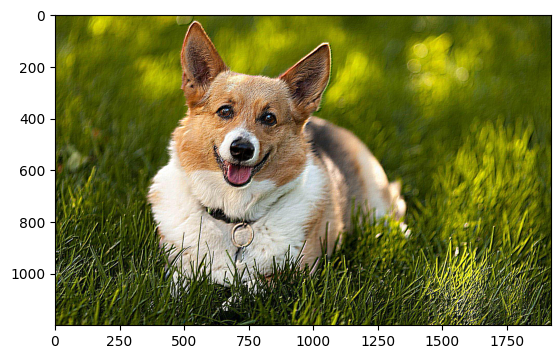

In [24]:
%%time

embossed = cv2.filter2D(corg, -1, emboss)
plt.imshow(embossed)

CPU times: user 3min 46s, sys: 440 ms, total: 3min 46s
Wall time: 3min 49s


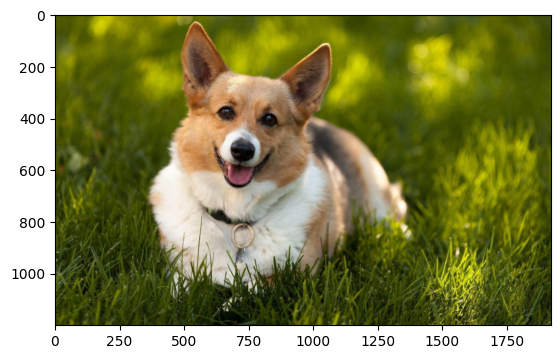

In [43]:
%%time 

totime = apply_filter(corgimg, np.array(gauss_blur))
plt.imshow(totime)

<ipython-input-18-8d756e62b272>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(url)


CPU times: user 224 ms, sys: 7.01 ms, total: 231 ms
Wall time: 548 ms


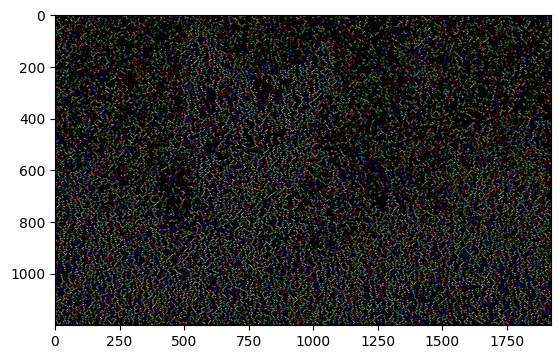

In [42]:
%%time
img16 = url_to_image('https://www.teahub.io/photos/full/236-2368950_happy-corgi-wallpaper-corgi-hd.jpg')
for fil in [emboss]+[np.array(x) for x in filter_names+filters]:
  img16 = cv2.filter2D(img16, -1, fil)
plt.imshow(img16)

Yeah, cv2 filter2D appears to be muuuuch faster. 12 filters over the same picture in 224ms vs only one filter in 4min 8sec (3min 46sec if we convert the filter to numpy array)

### Size of CNN

The formula for convolution size is 


$O = \frac{{W - K + 2P}}{S} + 1$

O - output result

W - input size

K - filter size

P - Padding

S - Stride

The input is:   $I = (width, height, channels)$

The output is: $O = (O_{weight}, O_{height}, Fn)$

So for an image 256x128 with 3 channels, stride 2, padding 1 and five 3x3 filters the result would be:

$O_{weight} = \frac{{256 - 3 + 2 * 1}}{2} + 1 = \frac{255}{2} + 1 = 127+1=128$

$O_{height} = \frac{{128 - 3 + 2 * 1}}{2} + 1 = \frac{127}{2} +1 = 63+1=64$

$Fn =$ the number of the filters which is 5

Thus for **(256, 128, 3)** with 5 filters 3x3, stride 2 and padding 1 the size will be **(128, 64, 5)**

for **(32,32,3)** and 10 5x5 filters it would be ($\frac{32-5+0}{2}+1=28$), thus activation map is **(28, 28, 10)** and tells us how filter matches to parts of image and every neuron in *28x28x10* is fully connected to **32x32x3** but actually we use *10x5x5* **x3** parameters and there are 5x5x3 x 28x28x10 computation in total.

In [4]:
def getO(w, k=3, p=0, s=1):
  return (w - k + 2 * p)//s +1 

def getsize(w, h, channel=3, filters=(3,3), filter_num=1, padding=0, stride=1):
  O_w = getO(w, filters[0],  padding, stride)
  O_h = getO(h, filters[1], padding, stride)
  return (O_w, O_h, filter_num)
  
  

In [5]:
getsize(1024, 768, 3, (5,5), stride=2)

(510, 382, 1)

In [6]:
getsize(500,700, 5, (7,4), stride=2)

(247, 349, 1)

Cobvolution itself is just dot products of vectors $$w^TX$$
and then Max operations $$max(.)$$

Each application of a filter to an area provides us with one number.

After each application of a filter on strides we get $$w^TX+b$$


So for *3* channels and *7x4* filter we get *dot product* with  *7x4x3 = 84 dimensions and + bias* 

